# Lesson 10 Notes and Examples

Kinematics is a branch of classical mechanics that describes the motion of points, bodies (objects), and systems of bodies (groups of objects) without considering the mass of each or the forces that caused the motion.[1][2][3] Kinematics, as a field of study, is often referred to as the "geometry of motion" and is occasionally seen as a branch of mathematics.[4][5][6] A kinematics problem begins by describing the geometry of the system and declaring the initial conditions of any known values of position, velocity and/or acceleration of points within the system. Then, using arguments from geometry, the position, velocity and acceleration of any unknown parts of the system can be determined. The study of how forces act on masses falls within kinetics. For further details, see analytical dynamics.

## 4. Two DoF ARM Example

joint0_angle = 121.9 degrees
joint1_angle = 118.8 degrees
End Effector at x = -36.1 y = -24.4


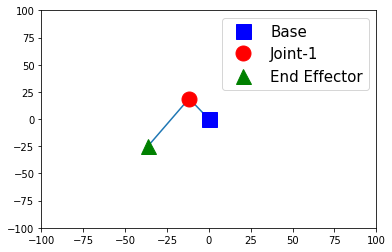

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Define a function to compute the arm configuration
def compute_arm_config(link1_length, link2_length, joint0_angle, joint1_angle):
    # TODO: compute the (x, y) position of the p1 joint and the end effector at p2.  
    joint1_x = link1_length * math.cos(joint0_angle)
    joint1_y = link1_length * math.sin(joint0_angle)
    vx = link2_length * math.cos(joint0_angle + joint1_angle)
    vy = link2_length * math.sin(joint0_angle + joint1_angle)
    p2_x = joint1_x + vx
    p2_y = joint1_y + vy
    return joint1_x, joint1_y, p2_x, p2_y
    
# Generate random link lengths and joint angles
# Note: because these are randomly generated on each run
# Every time you run the code you'll get a different result!
link1_length = np.random.random() * 30 + 20
link2_length = np.random.random() * 30 + 20
joint0_angle = np.random.random() * 2 * np.pi
joint1_angle = np.random.random() * 2 * np.pi

joint1_x, joint1_y, p2_x, p2_y = compute_arm_config(link1_length, link2_length, joint0_angle, joint1_angle)

print("joint0_angle =", round(joint0_angle * 180 / np.pi, 1), "degrees") 
print("joint1_angle =", round(joint1_angle * 180 / np.pi, 1),"degrees") 
print("End Effector at x =", round(p2_x, 1),"y =", round(p2_y, 1))
base_x = 0
base_y = 0
# Plot the links
plt.plot([base_x, joint1_x, p2_x], [base_y, joint1_y, p2_y])
# Plot the base as a blue square
plt.plot(base_x, base_y, 'bs', markersize=15, label='Base')
# Plot Joint-1 as a red circle
plt.plot(joint1_x, joint1_y, 'ro', markersize=15, label='Joint-1')
# Plot End Effector as a green triangle
plt.plot(p2_x, p2_y, 'g^', markersize=15, label='End Effector')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.legend(fontsize=15)
plt.show() # Uncomment to run locally

## 8. Euler Angles from a Rotation Matrix

In [10]:
import numpy as np
from sympy.matrices import Matrix
from sympy import symbols, atan2, sqrt, sin, cos

# Fixed Axis X-Y-Z Rotation Matrix
R_XYZ = Matrix([[ 0.353553390593274, -0.306186217847897, 0.883883476483184],
            [ 0.353553390593274,  0.918558653543692, 0.176776695296637],
            [-0.866025403784439,               0.25, 0.433012701892219]])

######## TO DO ##########
# Calculate the Euler angles that produces a rotation equivalent to R (above)
# NOTE: Be sure your answer has units of DEGREES!
rtd = 180./np.pi
alpha = rtd * atan2(R_XYZ[1,0], R_XYZ[0,0]) # rotation about Z-axis
beta  = rtd * atan2(-R_XYZ[2,0], sqrt((R_XYZ[0,0]**2) + (R_XYZ[1,0]**2)))# rotation about Y-axis
gamma = rtd * atan2(R_XYZ[2,1], R_XYZ[2,2]) # rotation about X-axis
print('alpha={} beta={} gamma={}'.format(alpha, beta, gamma))

alpha=45.0000000000000 beta=60.0000000000000 gamma=30.0000000000000


## 10. Homogeneous Transforms and their Inverse

In [14]:

###############################################################
# Problem Statement:
  # Let P be a vector expressed in frame {B} with (x,y,z)
  # coordinates = (15.0, 0.0, 42.0)
  # Rotate P about the Y-axis by angle = 110 degrees. 
  # Then translate the vector 1 unit
  # in the X-axis and 30 units in the Z-axis. 
  # Print the new (x, y, z) coordinates of P after the transformation.  
###############################################################
#### Create symbols for joint variables
q1 = symbols('q1')
Tx = symbols('Tx')
Ty = symbols('Ty')
Tz = symbols('Tz')

gamma  = symbols('gamma')

#### TO DO ####
# Replace P and T with appropriate expressions and calculate new coordinates of P in {A}. 
P = Matrix([15.0,0.0,42.0,1.0])     # P should be a 4x1 Matrix
T = Matrix([[ cos(q1), 0, sin(q1), Tx],
            [       0, 1,       0, Ty],
            [-sin(q1), 0, cos(q1), Tz],
            [       0, 0,       0,  1]])     # T Should be a 4x4 homogeneous Transform
dtr = np.pi/180.
P_new = T.evalf(subs={q1: 110*dtr, Tx: 1, Ty: 0, Tz: 30}) * P
print(P_new)

Matrix([[35.3367879231231], [0], [1.53976466853329], [1.00000000000000]])


## 11.Composition of Homogeneous Transforms

The following steps are taken to obtain coordinate frame E from frame A.

From Frame A to B to E:

Frame A: Located at [0, 0, 0]
Frame B: Rotate Frame A about a_y by -90 degrees. Translate A by [-2, 2, 4]
Frame E: Rotate Frame B about b_x by 90 degrees. Translate B by [0, 2, 0]
From Frame A to C to D to E:

Frame C: Translate A by [4, 4, 0]
Frame D: Rotate Frame C about c_x by 90 degrees. Translate C by [-3, 3, 2]
Frame E: Rotate Frame D about d_Z by 90 degrees. Translate D by [-3, 2, 3]

In [36]:
from sympy import symbols, cos, sin, pi, sqrt, simplify, eye
from sympy.matrices import Matrix
import numpy as np

### Create symbols for joint variables
# The numbers 1 to 4 correspond to each rotation in the order specified to you.
q1, q2, q3, q4 = symbols('q1:5')

### Define functions for Rotation Matrices about x, y, and z given specific angle.
dtr = pi/180.
def rot_x(q):
    R_x = Matrix([[ 1,              0,        0],
                  [ 0,        cos(q), -sin(q)],
                  [ 0,        sin(q),  cos(q)]])
    return R_x
    
def rot_y(q):              
    R_y = Matrix([[ cos(q),        0,  sin(q)],
                  [       0,        1,        0],
                  [-sin(q),        0,  cos(q)]])
    return R_y

def rot_z(q):    
    R_z = Matrix([[ cos(q), -sin(q),        0],
                  [ sin(q),  cos(q),        0],
                  [ 0,              0,        1]])
    return R_z
              
### Define rotations between frames

# Initial Rotation Matrix for Frame A
Ra = Matrix([[1, 0, 0],
             [0, 1, 0],
             [0, 0, 1]])

# Rotations performed on individual Frames for A->B->E
Rb_a = rot_y(q1)
Re_b = rot_x(q2)

# Rotations performed on individual Frames for A->C->D->E
Rc_a = Ra
Rd_c = rot_x(q3)
Re_d = rot_z(q4)

### Define Translations between frames.

tb_a = Matrix([-2.0,2.0,4.0])
te_b = Matrix([ 0.0,2.0,0.0])
tc_a = Matrix([ 4.0,4.0,0.0])
td_c = Matrix([-3.0,3.0,2.0])
te_d = Matrix([-3.0,2.0,3.0])

### Define homogenous transformation matrices
# HINT: Check out sympy's documentation for functions row_join and col_join
Ta = eye(4)

Tb_a = Rb_a.row_join(tb_a)
Tb_a = Tb_a.col_join(Matrix([[0.,0.,0.,1.]]))

Te_b = Re_b.row_join(te_b)
Te_b = Te_b.col_join(Matrix([[0.,0.,0.,1.]]))

Tc_a = Rc_a.row_join(tc_a)
Tc_a = Tc_a.col_join(Matrix([[0.,0.,0.,1.]]))

Td_c = Rd_c.row_join(td_c)
Td_c = Td_c.col_join(Matrix([[0.,0.,0.,1.]]))

Te_d = Re_d.row_join(te_d)
Te_d = Te_d.col_join(Matrix([[0.,0.,0.,1.]]))

### Composition of Transformations
Te_a_1 = simplify(Ta * Tb_a * Te_b)

Te_a_2 = simplify(Ta * Tc_a * Td_c * Te_d)

### Calculate orientation and position for E
E_1 = Te_a_1.evalf(subs={q1: -90.*dtr, q2: 90.*dtr}, chop = True)

E_2 = Te_a_2.evalf(subs={q3: 90.*dtr, q4: 90.*dtr}, chop = True)

print("Transformation Matrix for A->B->E:")
print(E_1)

print("Transformation Matrix for A->C->D->E:")
print(E_2)


Transformation Matrix for A->B->E:
Matrix([[0, -1.00000000000000, 0, -2.00000000000000], [0, 0, -1.00000000000000, 4.00000000000000], [1.00000000000000, 0, 0, 4.00000000000000], [0, 0, 0, 1.00000000000000]])
Transformation Matrix for A->C->D->E:
Matrix([[0, -1.00000000000000, 0, -2.00000000000000], [0, 0, -1.00000000000000, 4.00000000000000], [1.00000000000000, 0, 0, 4.00000000000000], [0, 0, 0, 1.00000000000000]])


## 17. Forward Kinematics

*Forward kinematics* problem of manipulators, that is, given the joint variables, calculate the location of the end effector

In [37]:
from sympy import symbols, cos, sin, pi, simplify
from sympy.matrices import Matrix

### Create symbols for joint variables
q1, q2, q3, q4 = symbols('q1:5')
d1, d2, d3, d4 = symbols('d1:5')
a0, a1, a2, a3 = symbols('a0:4')
alpha0, alpha1, alpha2, alpha3 = symbols('alpha0:4')

a12 = 0.4500 # meters
a23 = 0.3000 # meters

# DH Parameters
s = {alpha0: 0,  a0:   0, d1: 0, 
     alpha1: 0,  a1: a12, d2: 0,  
     alpha2: 0,  a2: a23,        q3: 0,
     alpha3: 0,  a3:   0, d4: 0}

#### Homogeneous Transforms
T0_1 = Matrix([[             cos(q1),            -sin(q1),            0,              a0],
               [ sin(q1)*cos(alpha0), cos(q1)*cos(alpha0), -sin(alpha0), -sin(alpha0)*d1],
               [ sin(q1)*sin(alpha0), cos(q1)*sin(alpha0),  cos(alpha0),  cos(alpha0)*d1],
               [                   0,                   0,            0,               1]])
T0_1 = T0_1.subs(s)

T1_2 = Matrix([[             cos(q2),            -sin(q2),            0,              a1],
               [ sin(q2)*cos(alpha1), cos(q2)*cos(alpha1), -sin(alpha1), -sin(alpha1)*d2],
               [ sin(q2)*sin(alpha1), cos(q2)*sin(alpha1),  cos(alpha1),  cos(alpha1)*d2],
               [                   0,                   0,            0,               1]])
T1_2 = T1_2.subs(s)

T2_3 = Matrix([[             cos(q3),            -sin(q3),            0,              a2],
               [ sin(q3)*cos(alpha2), cos(q3)*cos(alpha2), -sin(alpha2), -sin(alpha2)*d3],
               [ sin(q3)*sin(alpha2), cos(q3)*sin(alpha2),  cos(alpha2),  cos(alpha2)*d3],
               [                   0,                   0,            0,               1]])
T2_3 = T2_3.subs(s)

T3_4 = Matrix([[             cos(q4),            -sin(q4),            0,              a3],
               [ sin(q4)*cos(alpha3), cos(q4)*cos(alpha3), -sin(alpha3), -sin(alpha3)*d4],
               [ sin(q4)*sin(alpha3), cos(q4)*sin(alpha3),  cos(alpha3),  cos(alpha3)*d4],
               [                   0,                   0,            0,               1]])
T3_4 = T3_4.subs(s)

# Transform from base link to end effector
T0_4 = simplify(T0_1 * T1_2 * T2_3 * T3_4)

print(T0_4)

print(T0_4.evalf(subs={q1: 0, q2: 0, d3: 0, q4: 0}))

Matrix([[cos(q1 + q2 + q4), -sin(q1 + q2 + q4), 0, 0.45*cos(q1) + 0.3*cos(q1 + q2)], [sin(q1 + q2 + q4), cos(q1 + q2 + q4), 0, 0.45*sin(q1) + 0.3*sin(q1 + q2)], [0, 0, 1, d3], [0, 0, 0, 1]])
Matrix([[1.00000000000000, 0, 0, 0.750000000000000], [0, 1.00000000000000, 0, 0], [0, 0, 1.00000000000000, 0], [0, 0, 0, 1.00000000000000]])


# KR210 Kinematics Analysis

In [4]:
from mpmath import *
from sympy import *
import numpy as np
init_printing(use_unicode=True)

In [5]:
%%HTML
<style> code {background-color : white !important;} </style>

## DH Paramter Table

In [ ]:
### Create symbols for joint variables
# The numbers 1 to 4 correspond to each rotation in the order specified to you.
q1, q2, q3, q4, q5, q6, qG = symbols('q1:7,qG')
d1, d2, d3, d4, d5, d6, dG = symbols('d1:7,dG')
a0, a1, a2, a3, a4, a5, a6 = symbols('a0:7')
alpha0, alpha1, alpha2, alpha3, alpha4, alpha5, alpha6 = symbols('alpha0:7')

### KUKA KR210 ##
# DH Parameters       
s = {alpha0:     0, a0:      0, d1:  0.75,
     alpha1: -pi/2, a1:   0.35, d2:     0, q2: q2-pi/2,
     alpha2:     0, a2:   1.25, d3:     0,
     alpha3: -pi/2, a3: -0.054, d4:  1.50,
     alpha4:  pi/2, a4:      0, d5:     0,
     alpha5: -pi/2, a5:      0, d6:     0,
     alpha6:     0, a6:      0, dG: 0.303, qG: 0}

## Homogeneous Transform Derivation

In [10]:
### Define functions for Rotation Matrices about x, y, and z given specific angle.

def rot_x(q):
    R_x = Matrix([[ 1,              0,       0, 0],
                  [ 0,         cos(q), -sin(q), 0],
                  [ 0,         sin(q),  cos(q), 0],
                  [ 0,              0,       0, 1]])
    return R_x

def rot_y(q):              
    R_y = Matrix([[  cos(q),        0,  sin(q), 0],
                  [       0,        1,       0, 0],
                  [ -sin(q),        0,  cos(q), 0],
                  [       0,        0,       0, 1]])
    return R_y

def rot_z(q):    
    R_z = Matrix([[ cos(q), -sin(q),        0, 0],
                  [ sin(q),  cos(q),        0, 0],
                  [ 0,              0,      1, 0],
                  [ 0,              0,      0, 1]])
    return R_z

def T_i(alpha, a, theta, d):
    T = Matrix([[cos(theta), -sin(theta), 0, a],
                [sin(theta) * cos(alpha), cos(theta) *
                 cos(alpha), -sin(alpha), -sin(alpha) * d],
                [sin(theta) * sin(alpha), cos(theta) *
                 sin(alpha),  cos(alpha),  cos(alpha) * d],
                [0, 0, 0, 1]])
    return T

T0_1 = T_i(alpha0, a0, q1, d1)
T0_1 = T0_1.subs(s)

T1_2 = T_i(alpha1, a1, q2, d2)
T1_2 = T1_2.subs(s)

T2_3 = T_i(alpha2, a2, q3, d3)
T2_3 = T2_3.subs(s)

T3_4 = T_i(alpha3, a3, q4, d4)
T3_4 = T3_4.subs(s)

T4_5 = T_i(alpha4, a4, q5, d5)
T4_5 = T4_5.subs(s)

T5_6 = T_i(alpha5, a5, q6, d6)
T5_6 = T5_6.subs(s)

T6_G = T_i(alpha6, a6, qG, dG)
T6_G = T6_G.subs(s)

T0_2 = simplify(T0_1 * T1_2)
T0_3 = simplify(T0_2 * T2_3)
T0_4 = simplify(T0_3 * T3_4)
T0_5 = simplify(T0_4 * T4_5)
T0_6 = simplify(T0_5 * T5_6)
T0_G = simplify(T0_6 * T6_G)

R_z = rot_z(pi)
R_y = rot_y(-pi/2)
R_corr = simplify(R_z * R_y) # Intrinsic rotation about Z and then Y

T_total = simplify(T0_G * R_corr)
T_total

⎡-(sin(q₁)⋅sin(q₄) + sin(q₂ + q₃)⋅cos(q₁)⋅cos(q₄))⋅sin(q₅) + cos(q₁)⋅cos(q₅)⋅c
⎢                                                                             
⎢-(sin(q₁)⋅sin(q₂ + q₃)⋅cos(q₄) - sin(q₄)⋅cos(q₁))⋅sin(q₅) + sin(q₁)⋅cos(q₅)⋅c
⎢                                                                             
⎢                  -sin(q₅)⋅cos(q₄)⋅cos(q₂ + q₃) - sin(q₂ + q₃)⋅cos(q₅)       
⎢                                                                             
⎣                                           0                                 

os(q₂ + q₃)  ((sin(q₁)⋅sin(q₄) + sin(q₂ + q₃)⋅cos(q₁)⋅cos(q₄))⋅cos(q₅) + sin(q
                                                                              
os(q₂ + q₃)  ((sin(q₁)⋅sin(q₂ + q₃)⋅cos(q₄) - sin(q₄)⋅cos(q₁))⋅cos(q₅) + sin(q
                                                                              
                                            -(sin(q₅)⋅sin(q₂ + q₃) - cos(q₄)⋅c
                                                   

In [9]:
T_total.evalf(subs={q1: 0, q2: 0, q3: 0, q4: 0, q5: 0, q6: 0})

⎡1.0   0    0   2.153⎤
⎢                    ⎥
⎢ 0   1.0   0     0  ⎥
⎢                    ⎥
⎢ 0    0   1.0  1.946⎥
⎢                    ⎥
⎣ 0    0    0    1.0 ⎦

In [8]:
def quaternion_to_euler_angle(w, x, y, z):
    ysqr = y * y

    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + ysqr)
    X = float(atan2(t0, t1))

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = float(asin(t2))
    
    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (ysqr + z * z)
    Z = float(atan2(t3, t4))

    return X, Y, Z

In [38]:
# Format of test case is [ [[EE position],[EE orientation as quaternions]],[WC location],[joint angles]]
test_cases = {1:[[[2.16135,-1.42635,1.55109],
                  [0.708611,0.186356,-0.157931,0.661967]],
                  [1.89451,-1.44302,1.69366],
                  [-0.65,0.45,-0.36,0.95,0.79,0.49]],
              2:[[[-0.56754,0.93663,3.0038],
                  [0.62073, 0.48318,0.38759,0.480629]],
                  [-0.638,0.64198,2.9988],
                  [-0.79,-0.11,-2.33,1.94,1.14,-3.68]],
              3:[[[-1.3863,0.02074,0.90986],
                  [0.01735,-0.2179,0.9025,0.371016]],
                  [-1.1669,-0.17989,0.85137],
                  [-2.99,-0.12,0.94,4.06,1.29,-4.12]],
              4:[[[1.93844, 0.936621, 1.94653],
                  [3.31059e-05, -0.000144612, 0.223157, 0.974783]],
                  [0,0,0],
                  [0,0,0,0]]}
              
case_num = 1

EE_0 = Matrix(test_cases[case_num][0][0]).col_join(Matrix([1.]))
qx, qy, qz, qw = test_cases[case_num][0][1]
roll, pitch, yaw = quaternion_to_euler_angle(qw, qx, qy, qz)

EE_0

⎡2.16135 ⎤
⎢        ⎥
⎢-1.42635⎥
⎢        ⎥
⎢1.55109 ⎥
⎢        ⎥
⎣  1.0   ⎦

In [39]:
Matrix([roll, pitch, yaw])

⎡ 1.65443667112626 ⎤
⎢                  ⎥
⎢0.489909836665913 ⎥
⎢                  ⎥
⎣0.0623921697260466⎦

## Inverse Position Kinematics

\begin{align}
R_X & =
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos(\gamma) & -\sin(\gamma) \\
0 & \sin(\gamma) & \cos(\gamma)
\end{bmatrix} \\
R_Y & =
\begin{bmatrix}
\cos(\beta) & 0 & \sin(\beta) \\
0 & 1 & 0 \\
-\sin(\beta) & 0 & \cos(\beta)
\end{bmatrix} \\
R_Z & =
\begin{bmatrix}
\cos(\alpha) & -\sin(\alpha) & 0 \\
\sin(\alpha) & \cos(\alpha) & 0 \\
0 & 0 & 1
\end{bmatrix} \\
^{DH}_{URDF}R = R_{corr} & = R_Z(\pi)\;R_Y(\frac{-\pi}{2}) \\
R_{rpy} & = R_Z(yaw)\;R_Y(pitch)\;R_X(roll)\;R_{corr} =
\begin{bmatrix}
l_x & m_x & n_x \\
l_y & m_y & n_y \\
l_z & m_z & n_z
\end{bmatrix} \\
_0WC & = _0EE - d_G.n
\end{align}

In [40]:
Rrpy = rot_z(yaw) * rot_y(pitch) * rot_x(roll) * R_corr # x-y-z extrinsic rotation
Rrpy

⎡ 0.022899431751322   -0.473198058711374  0.880658397596511   0⎤
⎢                                                              ⎥
⎢-0.997016321214639   0.0541435058209021  0.0550175972671376  0⎥
⎢                                                              ⎥
⎢-0.0737161532982667  -0.879290667532193   -0.470546332186    0⎥
⎢                                                              ⎥
⎣         0                   0                   0           1⎦

In [41]:
n_0 = Rrpy.col(2)
n_0

⎡0.880658397596511 ⎤
⎢                  ⎥
⎢0.0550175972671376⎥
⎢                  ⎥
⎢ -0.470546332186  ⎥
⎢                  ⎥
⎣        0         ⎦

In [42]:
WC_0 = EE_0 - dG*n_0
WC_0 = WC_0.subs(s)
WC_0

⎡1.89451050552826 ⎤
⎢                 ⎥
⎢-1.44302033197194⎥
⎢                 ⎥
⎢1.69366553865236 ⎥
⎢                 ⎥
⎣       1.0       ⎦

\begin{align}
\theta_1 = atan2(_0WC_y, _0WC_x) \\
\end{align}

In [43]:
theta1 = float(atan2(WC_0[1], WC_0[0]))
float(degrees(theta1))

\begin{align}
_2O_x & = a_1 \times \cos(\theta_1) \\
_2O_y & = a_1 \times \sin(\theta_1) \\
_2O_z & = d_1 \\
_2WC & = _0WC - _2O \\
\text{where}&\;_2WC \text{ is the wrist center in frame }_2O
\end{align}

In [49]:
#print('\nWC:\nExpected={}\nActual={}'.format(test_cases[case_num][1], WC_0))
O2_x = a1*cos(theta1)
O2_y = a1*sin(theta1)
O2_z = d1
WC_2 = Matrix([WC_0[0] - O2_x, WC_0[1] - O2_y, WC_0[2] - O2_z])
WC_2 = WC_2.subs(s)
WC_2

⎡1.61607991625526 ⎤
⎢                 ⎥
⎢-1.23094391424217⎥
⎢                 ⎥
⎣0.943665538652358⎦

\begin{align}
A & = \sqrt{d_4^2 + a_3^2} \\
B & = \sqrt{_2WC_x^2 + _2WC_y^2 + _2WC_z^2} \\
C & = a_2 \\
\text{where} & \text{ A, B, and C are the sides of an SSS triangle}
\end{align}

In [50]:
A = sqrt(s[d4]*s[d4] + s[a3]*s[a3])
B = sqrt(WC_2[0]*WC_2[0] + WC_2[1]*WC_2[1] + WC_2[2]*WC_2[2])
C = s[a2]
#print('A,B,C=', A, B, C)

\begin{align}
\phi_1 & = \arccos(\frac{B^2+C^2-A^2}{2BC}) \\
\phi_2 & = \arcsin(\frac{_2WC_z}{B}) \\
\phi_3 & = \arccos(\frac{A^2+C^2-B^2}{2AC}) \\
\phi_4 & = \arccos(\frac{d_4}{A})
\end{align}

In [ ]:
phi1 = acos((B*B+C*C-A*A)/(2*B*C))
phi2 = asin(WC_2[2]/B)
phi3 = acos((A*A+C*C-B*B)/(2*A*C))
phi4 = acos(s[d4]/A)

\begin{align}
\theta_2 & = \frac{\pi}{2} - (\phi_1 + \phi_2) \\
\theta_3 & = \frac{\pi}{2} - (\phi_3 + \phi_4)
\end{align}

In [51]:
theta2 = float(pi/2 - (phi1 + phi2))
float(degrees(theta2))

In [52]:
theta3 = float(pi/2 - (phi3 + phi4))
float(degrees(theta3))

# Inverse Orientation Kinematics

Rrpy is the input EE rotation
R0_6 is the rotation part of the homogeneous transformation T(0,EE)
R0_6 = Rrpy
R3_6 = inv(R0_3) * Rrpy

In [54]:
R3_6 = simplify(T3_4 * T4_5 * T5_6)[:3,:3]
R3_6

⎡-sin(q₄)⋅sin(q₆) + cos(q₄)⋅cos(q₅)⋅cos(q₆)  -sin(q₄)⋅cos(q₆) - sin(q₆)⋅cos(q₄
⎢                                                                             
⎢             sin(q₅)⋅cos(q₆)                             -sin(q₅)⋅sin(q₆)    
⎢                                                                             
⎣-sin(q₄)⋅cos(q₅)⋅cos(q₆) - sin(q₆)⋅cos(q₄)  sin(q₄)⋅sin(q₆)⋅cos(q₅) - cos(q₄)

)⋅cos(q₅)  -sin(q₅)⋅cos(q₄)⎤
                           ⎥
               cos(q₅)     ⎥
                           ⎥
⋅cos(q₆)   sin(q₄)⋅sin(q₅) ⎦

\begin{align}
^3_6R = ^0_3R^T\;R_{rpy} =
\begin{bmatrix}
r_{11} & r_{12} & r_{13} \\
r_{21} & r_{22} & r_{23} \\ 
r_{31} & r_{32} & r_{33}
\end{bmatrix}
\end{align}

In [55]:
R0_3 = T0_3[0:3,0:3]
R0_3

⎡sin(q₂ + q₃)⋅cos(q₁)  cos(q₁)⋅cos(q₂ + q₃)  -sin(q₁)⎤
⎢                                                    ⎥
⎢sin(q₁)⋅sin(q₂ + q₃)  sin(q₁)⋅cos(q₂ + q₃)  cos(q₁) ⎥
⎢                                                    ⎥
⎣    cos(q₂ + q₃)         -sin(q₂ + q₃)         0    ⎦

In [56]:
R0_3 = R0_3.evalf(subs={q1: theta1, q2: theta2, q3: theta3})
R0_3

⎡0.0684477997540263    0.792565805597203   0.605932622085071⎤
⎢                                                           ⎥
⎢-0.0521356658807564  -0.603685526454014   0.795515969351408⎥
⎢                                                           ⎥
⎣ 0.996291509073526   -0.0860420185025732          0        ⎦

In [57]:
R3_6 = R0_3.T * Rrpy[0:3,0:3]
R3_6

⎡-0.0198952520931227  -0.911241999765677  -0.411390564800896⎤
⎢                                                           ⎥
⎢ 0.626376315955436   -0.332070307540225  0.705253161396839 ⎥
⎢                                                           ⎥
⎣-0.779266892504902   -0.24365411696335   0.577387029238243 ⎦

\begin{align}
\theta_6 & = atan2(r_{21},r_{11}) \\
\theta_5 & = atan2(-r_{31}, \sqrt{r_{11}^2+r_{21}^2}) \\
\theta_4 & = atan2(r_{32}, r_{33})
\end{align}

In [24]:
# Entries of the rotation matrix
r11 = R3_6[0,0]
r21 = R3_6[1,0]
r31 = R3_6[2,0]
r32 = R3_6[2,1]
r33 = R3_6[2,2]

# Euler angles, cf. conventions in writeup    
theta6 = atan2( r21, r11).evalf()                    # alpha, rotation about z-axis
theta5 = atan2(-r31, sqrt(r11**2 + r21**2)).evalf()  # beta,  rotation about y-axis
theta4 = atan2( r32, r33).evalf()                    # gamma, rotation about x-axis

print('q1-q6:\nExpected={}\nActual={}\n'.format(test_cases[case_num][2], [theta1, theta2, theta3, theta4, theta5, theta6]))
T_total.evalf(subs={q1: theta1, q2: theta2, q3: theta3, q4: theta4, q5: theta5, q6: theta6})


q1-q6:
Expected=[-0.65, 0.45, -0.36, 0.95, 0.79, 0.49]
Actual=[-0.650937693394287, 0.44821369527573346, -0.362065156729985, -0.399322160595541, 0.893495160196978, 1.60254811109211]



⎡ 0.26397019944359   0.787495540508712   -0.556929535475183  1.97449347595966 
⎢                                                                             
⎢-0.581914636457114  -0.330460648226185  -0.743082173013803  -1.61934046681845
⎢                                                                             
⎢-0.76921719278933    0.5202369975817    0.371023417946201   1.46059272923718 
⎢                                                                             
⎣        0                   0                   0                  1.0       

⎤
⎥
⎥
⎥
⎥
⎥
⎦